In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def getDf():
    files = {}
    for size in [1500000, 1800000, 2500000, 2800000, 3500000, 3800000 ]:
        with open("../result/resultRustOwnerType_init_true_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1500000']
    for s in [1800000, 2500000, 2800000, 3500000, 3800000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str,"init": str , "size": int, "field": str, "createtime":int,  \
                        'accesstime': int,"totaltime": int})
    return data

In [4]:
df = getDf()

In [5]:
df.head()

,datastructure,init,size,field,createtime,accesstime,totaltime
1,[RustVector],true,1500000,"""own""",422,12454,14557
2,[RustVector],true,1500000,"""own""",317,12590,14593
3,[RustVector],true,1500000,"""own""",315,10513,12499
4,[RustVector],true,1500000,"""own""",316,9168,11172
5,[RustVector],true,1500000,"""own""",312,11647,13648


In [6]:
df_avg = df.groupby(["size", "field"]).mean().reset_index()

In [7]:
df_avg

,size,field,createtime,accesstime,totaltime
0,1500000,"""own""",336.4,11274.4,13293.8
1,1500000,"""reference""",99.8,10449.6,12221.8
2,1500000,"""slice""",169.8,9900.8,11770.0
3,1800000,"""own""",384.6,13540.0,15964.4
4,1800000,"""reference""",120.0,13875.2,16034.6
5,1800000,"""slice""",207.2,12778.2,15057.2
6,2500000,"""own""",532.2,16253.6,19631.8
7,2500000,"""reference""",166.4,16671.8,19688.6
8,2500000,"""slice""",283.0,16228.6,19400.4
9,2800000,"""own""",591.2,17937.2,21744.8


In [8]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


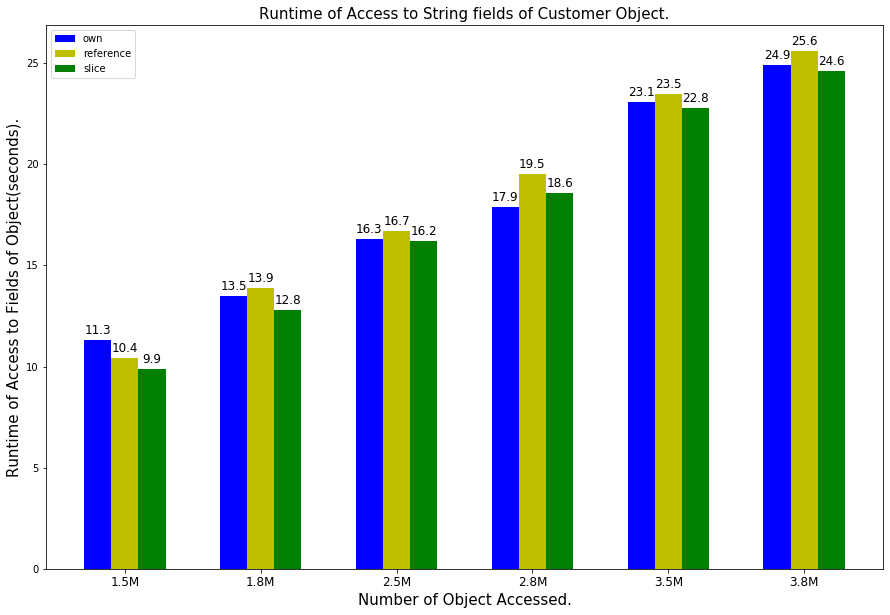

In [9]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"reference"']
slice_type = df_avg[df_avg["field"] == '"slice"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, round(own["accesstime"] / 1000, 1), width = w, color ='b', align = 'center')
b2 = ax.bar(idx , round(reference["accesstime"] / 1000, 1), width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, round(slice_type["accesstime"] / 1000, 1), width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels([str(n) + "M" for n in (label / 1000000)], fontsize = 12)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(seconds).", fontsize = 15)
ax.set_title("Runtime of Access to String fields of Customer Object.", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
autolabel(b3, ax)
ax.legend((b1, b2, b3), ("own", "reference", "slice"))
#ax.set_yscale('log')
fig.savefig("rust_access_different_poniter_init.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

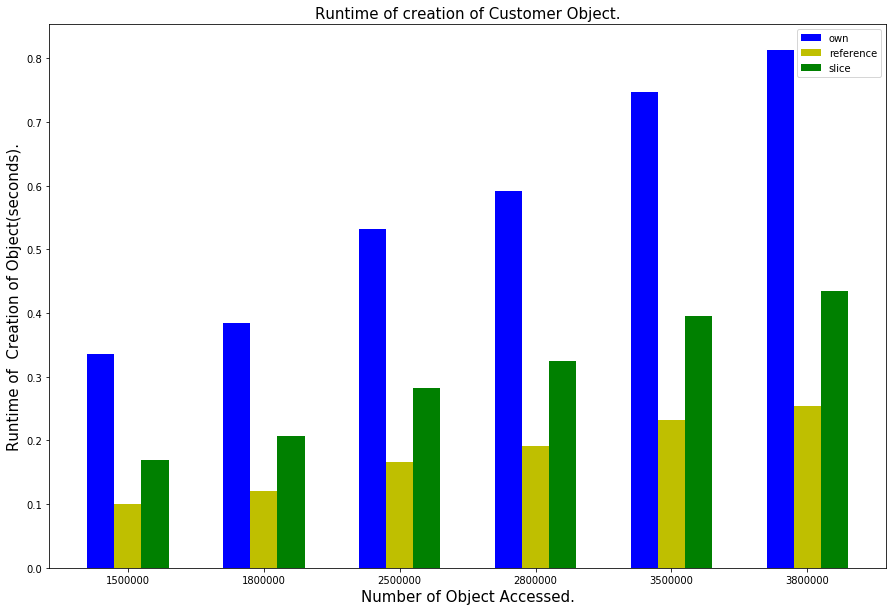

In [10]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"reference"']
slice_type = df_avg[df_avg["field"] == '"slice"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, own["createtime"] / 1000, width = w, color ='b', align = 'center')
b2 = ax.bar(idx , reference["createtime"] / 1000, width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, slice_type["createtime"] / 1000, width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of  Creation of Object(seconds).", fontsize = 15)
ax.set_title("Runtime of creation of Customer Object.", fontsize = 15)
ax.legend((b1, b2, b3), ("own", "reference", "slice"))
#ax.set_yscale('log')
#fig.savefig("rust_different_insertion_noinit.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

##### 

In [39]:
vs = own["accesstime"].values
p_diff = np.array([])
for i in range(1, vs.shape[0]):
    v = (vs[i] - vs[i - 1]) 
    p_diff = np.append(p_diff, v)

In [40]:
vs

array([11274.4, 13540. , 16253.6, 17937.2, 23065.8, 24922.6])

In [48]:
p_diff

array([2265.6, 2713.6, 1683.6, 5128.6, 1856.8])

In [42]:
p_diff / np.array([3, 7, 3, 7, 3])

array([755.2       , 387.65714286, 561.2       , 732.65714286,
       618.93333333])

In [47]:
((vs[5] - vs[0]) / vs[0]) * 100 

121.05477896828212

In [56]:
(p_diff / vs[:][:5]) * 100

array([20.09508267, 20.04135894, 10.35832062, 28.59197645,  8.05001344])